In [117]:
####Comp90024_group10
###Shanrui Huang - 1533562
###Lingyi Zhang - 1470460
###Jiaxing Wang - 1511557
###Yunru Zhu - 1470423

In [ ]:
import sys
import os
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [118]:
path = os.getcwd()
sys.path.append(path)
import get_bom_data
import get_epa_data
import importlib

In [119]:
from elasticsearch import Elasticsearch
# Connect to the Elasticsearch server
es = Elasticsearch(
    ['https://localhost:9200'],
    http_auth=('elastic', 'elastic'),
    verify_certs=False  
)

/home/yunru/anaconda3/lib/python3.11/site-packages/elasticsearch/_sync/client/__init__.py:399: SecurityWarning: Connecting to 'https://localhost:9200' using TLS with verify_certs=False is insecure
  _transport = transport_class(
/tmp/ipykernel_12734/1149806364.py:3: DeprecationWarning: The 'http_auth' parameter is deprecated. Use 'basic_auth' or 'bearer_auth' parameters instead
  es = Elasticsearch(


In [120]:
importlib.reload(get_bom_data)

<module 'get_bom_data' from '/home/yunru/comp90024/frond_end/get_bom_data.py'>

### Data Search

In [121]:
epa = get_epa_data.search_epa(es, 'epa')
epa = pd.DataFrame(epa)
epa.rename(columns={'since': 'date'}, inplace=True)
epa

/home/yunru/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


,site_name,date,PM2.5
0,Mildura,2024-05-21T02:00:00Z,1.02
1,Mildura,2024-05-21T01:00:00Z,1.74
2,Mildura,2024-05-21T00:00:00Z,2.37
3,Mildura,2024-05-20T23:00:00Z,3.36
4,Mildura,2024-05-20T22:00:00Z,4.17
5,Mildura,2024-05-20T21:00:00Z,6.08
6,Mildura,2024-05-20T20:00:00Z,1.68
7,Mildura,2024-05-20T19:00:00Z,1.38
8,Mildura,2024-05-20T18:00:00Z,2.81
9,Mildura,2024-05-20T17:00:00Z,8.92


In [122]:
bom = get_bom_data.search_bom(es, 'bom')
bom = pd.DataFrame(bom)
bom.rename(columns={'since': 'date'}, inplace=True)
bom

/home/yunru/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


,date,site_name,wind_speed
0,2024-05-21T16:00:00Z,Mildura,15
1,2024-05-21T15:30:00Z,Mildura,17
2,2024-05-21T15:00:00Z,Mildura,13
3,2024-05-21T14:30:00Z,Mildura,13
4,2024-05-21T14:00:00Z,Mildura,11
...,...,...,...
149,2024-05-18T18:30:00Z,Mildura,9
150,2024-05-18T18:00:00Z,Mildura,9
151,2024-05-18T17:30:00Z,Mildura,13
152,2024-05-18T17:00:00Z,Mildura,13


### Analysis

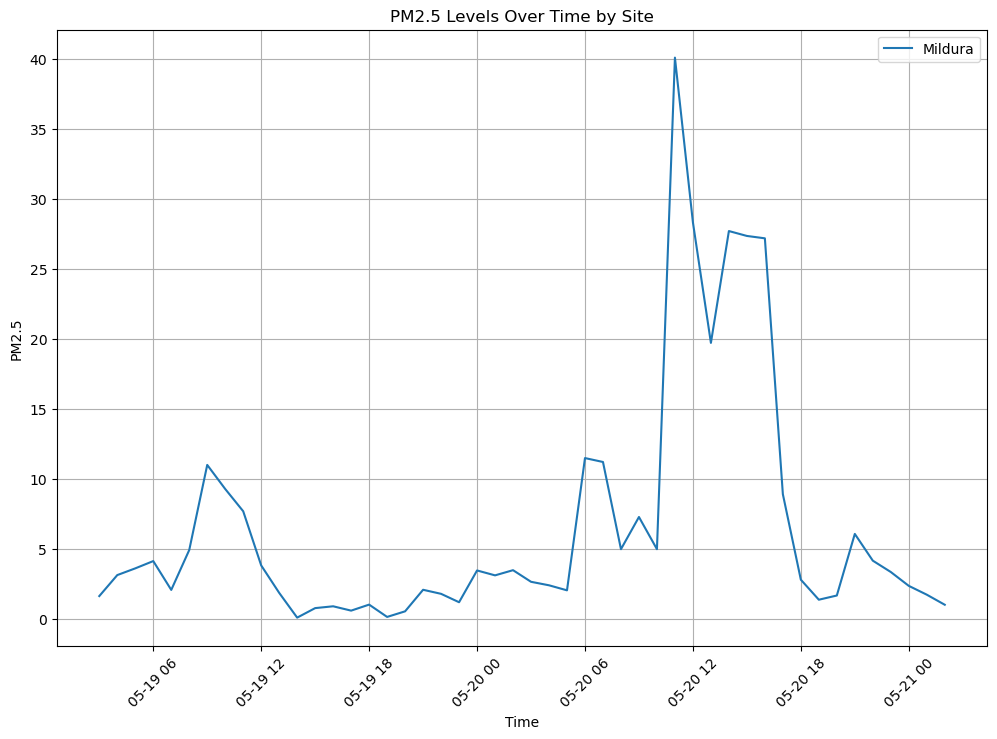

In [123]:
epa['date'] = pd.to_datetime(epa['date'])

# Plot line chart
plt.figure(figsize=(12, 8))

# Plot PM2.5 values for each site
for site in epa['site_name'].unique():
    site_data = epa[epa['site_name'] == site]
    plt.plot(site_data['date'], site_data['PM2.5'], label=site)

# Set legend and labels
plt.legend()
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.title('PM2.5 Levels Over Time by Site')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

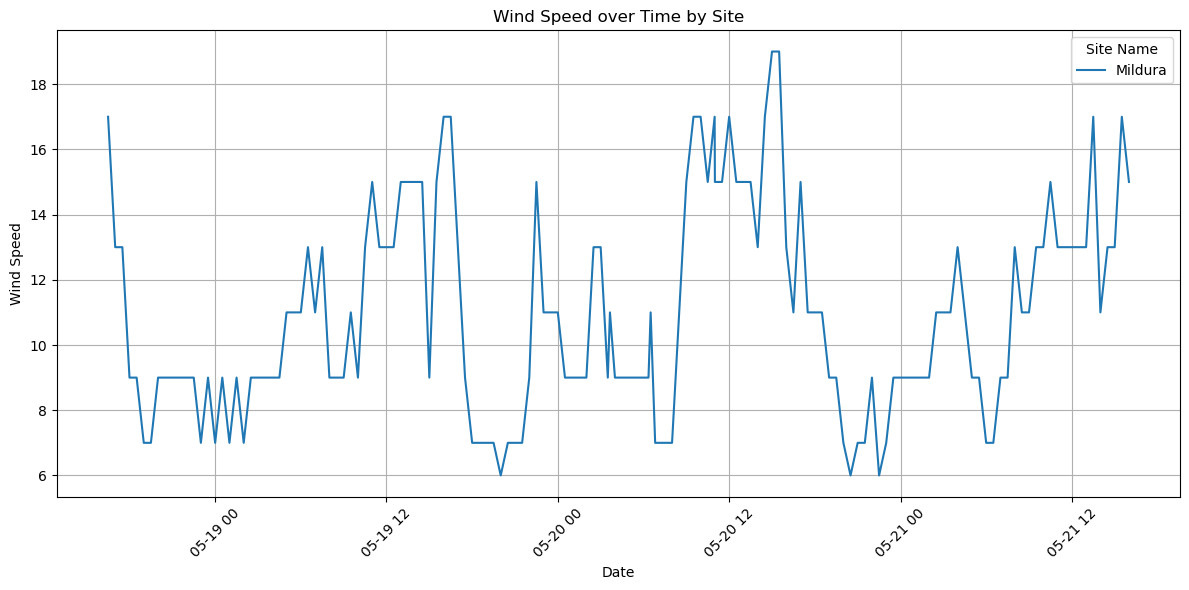

In [124]:
# Convert the 'date' column to datetime format
bom['date'] = pd.to_datetime(bom['date'])

# Plotting the line graph
plt.figure(figsize=(12, 6))

# Plot each site with a different color
for site in bom['site_name'].unique():
    site_data = bom[bom['site_name'] == site]
    plt.plot(site_data['date'], site_data['wind_speed'], label=site)

plt.xlabel('Date')
plt.ylabel('Wind Speed')
plt.title('Wind Speed over Time by Site')
plt.legend(title='Site Name')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
# Show the plot
plt.show()

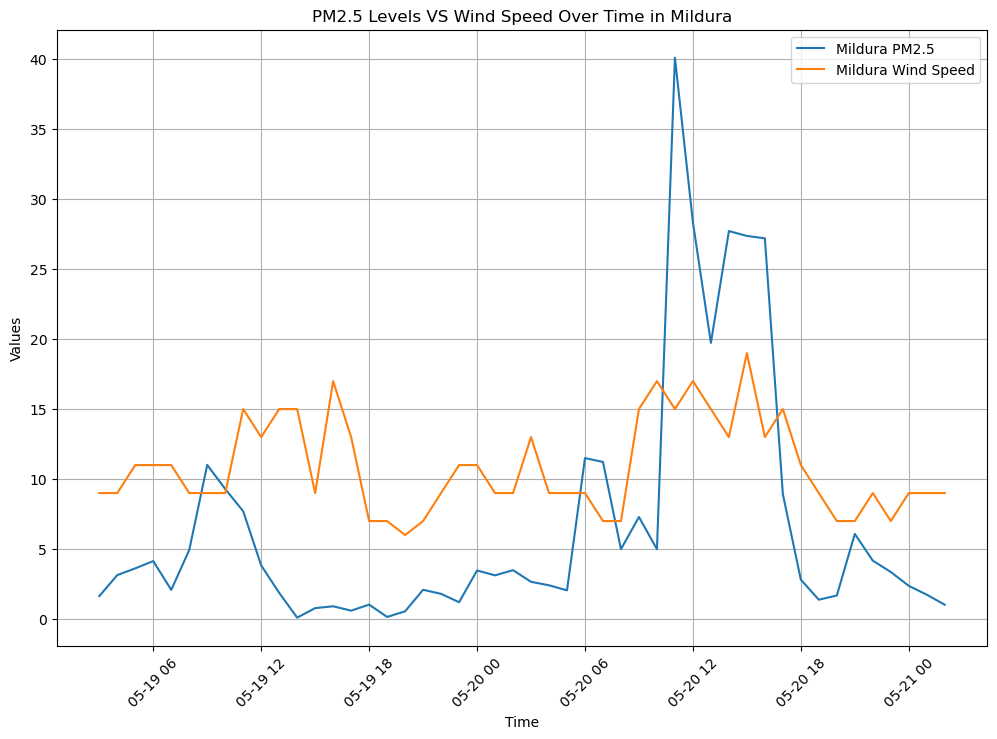

In [125]:
bom['date'] = pd.to_datetime(bom['date'])
# Filter data for 'Mildura'
epa_mildura = epa[epa['site_name'] == 'Mildura']
bom_mildura = bom[bom['site_name'] == 'Mildura']

# Merge data for 'Mildura' on 'date'
merged_mildura = pd.merge(epa_mildura, bom_mildura, on='date', suffixes=('_epa', '_bom'))

# Plot PM2.5 and wind speed for 'Mildura'
plt.figure(figsize=(12, 8))

plt.plot(merged_mildura['date'], merged_mildura['PM2.5'], label='Mildura PM2.5')
plt.plot(merged_mildura['date'], merged_mildura['wind_speed'], label='Mildura Wind Speed')

# Set legend and labels
plt.legend()
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('PM2.5 Levels VS Wind Speed Over Time in Mildura')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [126]:
correlation = merged_mildura['PM2.5'].corr(merged_mildura['wind_speed'])
correlation

0.4815297392194288